# **Q1**

Imports

In [1]:
import pandas as pd
import numpy as np

Load data and set hyper parameters

In [2]:
batch_size = 2
learning_rate = 0.05
w = [1, 1, 1]

data_set = pd.DataFrame([[22, 1, 1, 0], [25, 0, 1, 0], [47, 1, 1, 1], [52, 0, 1, 0], [46, 1, 1, 1], [56, 1, 1, 1], [55, 0, 1, 0], [60, 0, 1, 1]], columns=['x1', 'x2', 'b', 'y'])
data_set

,x1,x2,b,y
0,22,1,1,0
1,25,0,1,0
2,47,1,1,1
3,52,0,1,0
4,46,1,1,1
5,56,1,1,1
6,55,0,1,0
7,60,0,1,1


Train

In [3]:
for epoch in range(2):
    for iteration in range(data_set.shape[0] // batch_size):
        batch = data_set.loc[batch_size * iteration: batch_size * iteration + batch_size - 1]
        
        y_hat = []
        for b in batch.values:
            y_hat.append(1 / (1 + np.exp(-np.multiply(w, b[:3]).sum())))
        # print('y_hat:', y_hat)

        L = (-1 / batch_size) * np.add(np.multiply(batch['y'], np.log(y_hat)), np.multiply(np.subtract(1, batch['y']), np.log(np.subtract(1, y_hat)))).sum()
        # print('L:', L)

        for i in range(len(w)):
            w[i] = np.subtract(w[i], learning_rate * (-1 / batch_size) * np.multiply(np.subtract(batch['y'], y_hat), batch[batch.columns[i]] ).sum())
            # print((-1 / batch_size) * np.multiply(np.subtract(batch['y'], y_hat), batch[batch.columns[i]] ).sum())
        print('w:', w)
        

w: [-0.17499999997604365, 0.9750000000009438, 0.9500000000010715]
w: [0.9974710491433747, 0.9999541765273299, 0.9749469602270591]
w: [0.9974710491433747, 0.9999541765273299, 0.9749469602270591]
w: [-0.3775289508566253, 0.9999541765273299, 0.949946960227059]
w: [-0.3786111518557669, 0.9999108328833569, 0.9498984709498166]
w: [0.7963886842666572, 1.0249108295980127, 0.9748984674824263]
w: [0.7963886842666572, 1.0249108295980127, 0.9748984674824263]
w: [-0.5786113157333428, 1.0249108295980127, 0.9498984674824262]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


# **Q2**

Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.patches as mpatches

Load input data


In [5]:
data_set = pd.DataFrame([[2.3, 0], [1.4, 0], [2.6, 0], [3.1, 0], [1.8, 0], [2.8, 0], [5.4, 1], [6.3, 1], [5.8, 1], [6.7, 1], [4.9, 1], [45.2, 1]], columns=['x', 'y'])
data_set

,x,y
0,2.3,0
1,1.4,0
2,2.6,0
3,3.1,0
4,1.8,0
5,2.8,0
6,5.4,1
7,6.3,1
8,5.8,1
9,6.7,1


Fit Logistic Regression

In [6]:
lo_model = LogisticRegression()
lo_model.fit(np.array(data_set['x']).reshape(-1, 1), data_set['y'])

lo_w = lo_model.coef_[0]
lo_b = lo_model.intercept_[0]
lo_boundary = -lo_b / lo_w
print('w:', lo_w, 'b:', lo_b, 'boundary:', lo_boundary)

w: [1.43516077] b: -5.924735403729955 boundary: [4.12827297]


Fit Linear Regression

In [7]:
li_model = LinearRegression()
li_model.fit(np.array(data_set['x']).reshape(-1, 1), data_set['y'])

li_w = list(li_model.coef_)
li_b = li_model.intercept_
li_boundary = (0.5 - li_b)/li_w[0]
print('w:', li_w, 'b:', li_b, 'boundary:', li_boundary)

w: [0.01885094674164668] b: 0.36128845022604983 boundary: 7.358333333333335


Plot

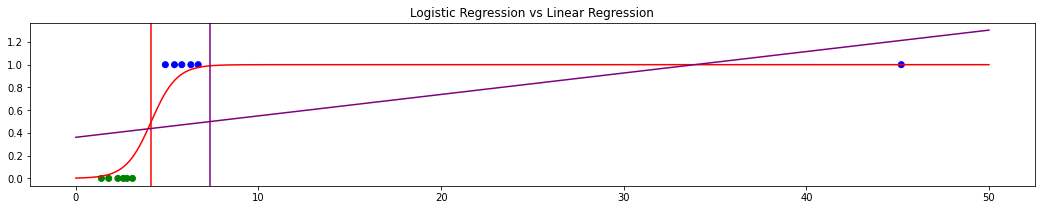

In [8]:
colormap = np.array(['green', 'blue'])
plt.figure(figsize=(18, 3))

plt.scatter(data_set['x'], data_set['y'], c=colormap[data_set['y']])
tmp_X = np.linspace(0, 50, 1000)

plt.plot(tmp_X, 1 / (1 + np.exp(-(lo_w[0] * tmp_X + lo_b))) , c='red')
plt.axvline(lo_boundary, c='red')

plt.plot(tmp_X, tmp_X * li_w[0] + li_b, c='Purple')
plt.axvline(li_boundary, c='Purple')

plt.title('Logistic Regression vs Linear Regression')

plt.show()

# **Q3**

Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

Hyperparameters

In [10]:
test_prop = .3 

Load data set

In [11]:
iris = datasets.load_iris()

X = iris.data[:, :2]
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

Y = iris.target
Y = pd.DataFrame(Y, columns=['result'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_prop)
x_train

,feature_1,feature_2
148,6.2,3.4
128,6.4,2.8
22,4.6,3.6
28,5.2,3.4
3,4.6,3.1
...,...,...
95,5.7,3.0
0,5.1,3.5
145,6.7,3.0
83,6.0,2.7


Plot 2d train and test data

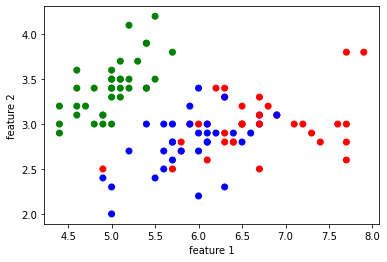

In [12]:
colormap = np.array(['green', 'blue', 'red'])
plt.scatter(x_train['feature_1'], x_train['feature_2'], c=colormap[y_train['result']])

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.show()

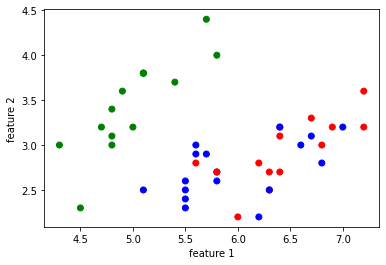

In [13]:
colormap = np.array(['green', 'blue', 'red'])
plt.scatter(x_test['feature_1'], x_test['feature_2'], c=colormap[y_test['result']])

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.show()

Normalize

In [14]:
sc = StandardScaler()
sc.fit(x_train)
x_train = pd.DataFrame(sc.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

Fit

In [15]:
model = LogisticRegression(multi_class='auto')
model.fit(x_train, y_train['result'])

model.score(x_train, y_train)

0.8380952380952381

Test

In [16]:
y_predict = model.predict(x_test)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.71      0.63      0.67        19
           2       0.57      0.62      0.59        13

    accuracy                           0.73        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.73      0.73      0.73        45



Confusion matrix

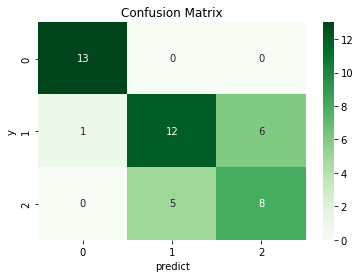

In [17]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot=True, cmap='Greens')

plt.xlabel('predict')
plt.ylabel('y')
plt.title('Confusion Matrix')

plt.show()